In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [2]:
import os
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn
import cv2
import pickle
import random
import tensorflow

In [3]:
print("Number of GPUs Available: ", tensorflow.config.list_physical_devices('GPU'))

Number of GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## configurations

In [4]:
os.chdir("/content/drive/MyDrive/Developement/Image_Emotion_Detection_System")

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [6]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (5, 3)

In [7]:
Training_Data_Path="./Data/Main_Data/Training_Data/"
Testing_Data_Path="./Data/Main_Data/Testing_Data/"

In [8]:
class_list=os.listdir(Training_Data_Path)

In [9]:
class_list.sort()

In [10]:
class_list

['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise']

In [11]:
resize_dimension=(224,224)

# Data Exploration

In [12]:
def showImages(folder_path,number_of_images=10,list_of_paths=[i for i in class_list]):
    for class_name in list_of_paths:
        print(class_name)
        class_path=os.path.join(folder_path,class_name)
        counter=1
        for image_name in os.listdir(class_path):
            image_array=cv2.imread(os.path.join(class_path,image_name),cv2.IMREAD_COLOR)
            faces_rect = face_cascade.detectMultiScale(image_array)
            for (x, y, w, h) in faces_rect:
                cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                image_array=image_array[y:y+h,x:x+w]
                print(image_array)
                break
            image_array=cv2.resize(image_array,resize_dimension)
            pyplot.imshow(image_array)
            pyplot.show()
            if counter>=number_of_images:
                break
            counter+=1

anger
[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [129 158 203]
  ...
  [ 53  60  99]
  [ 53  60  99]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [ 93 123 170]
  ...
  [ 66  53  55]
  [ 66  53  55]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [ 93 123 170]
  ...
  [ 66  53  55]
  [ 66  53  55]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


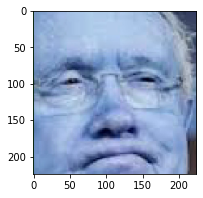

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [255 253 252]
  ...
  [190 186 167]
  [197 195 177]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [135 139 144]
  ...
  [ 96  84  72]
  [104  92  80]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [130 132 133]
  ...
  [101  89  71]
  [110  95  79]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


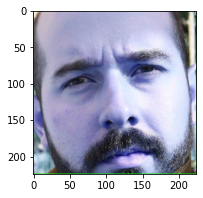

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [ 42  50  67]
  ...
  [ 71  77  96]
  [ 91  96 111]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [ 29  19  19]
  ...
  [ 47  48  68]
  [ 41  41  57]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [ 30  20  20]
  ...
  [ 38  41  56]
  [ 50  50  62]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


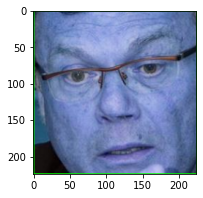

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [240 241 237]
  ...
  [ 36  45  55]
  [ 32  38  49]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [212 215 213]
  ...
  [200 174 160]
  [190 168 157]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [213 214 212]
  ...
  [194 169 153]
  [200 178 167]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


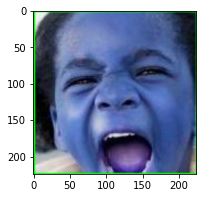

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [ 88  91  96]
  ...
  [166 171 202]
  [165 167 201]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [238 214 202]
  ...
  [178 143 133]
  [173 137 129]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [236 213 198]
  ...
  [170 138 127]
  [165 132 123]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


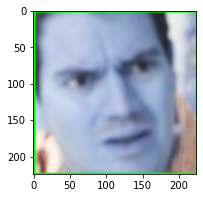

In [13]:
showImages(Training_Data_Path,number_of_images=5,list_of_paths=['anger'])

In [14]:
def getClassImagesData(folder_path,size=False):
    if size!=False:
        print("Data size is restricted")
    Data=[]
    for class_name in class_list:
        class_path=os.path.join(folder_path,class_name)
        counter=0
        print("Number of files to be Traversed-->",size if size!=False and len(os.listdir(class_path))>size else len(os.listdir(class_path)))
        for image_name in os.listdir(class_path):
            counter+=1
            print(counter,end=",")
            image_array=cv2.imread(os.path.join(class_path,image_name),cv2.IMREAD_COLOR)
            faces_rect = face_cascade.detectMultiScale(image_array)
            for (x, y, w, h) in faces_rect:
                image_array=image_array[y:y+h,x:x+w]
                break
            image_array=cv2.resize(image_array,resize_dimension)            
            Data.append([image_array,class_list.index(class_name)])
            if size!=False and counter>=size:
                break
        print()
        print(class_name,counter)
        print()
    return Data

In [15]:
Training_Data = getClassImagesData(Training_Data_Path)

Number of files to be Traversed--> 5000
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,

In [16]:
random.shuffle(Training_Data)

In [4]:
Training_Data[0]

NameError: ignored

In [18]:
Training_Features=[]
Training_Label=[]
for image_array_value,label in Training_Data:
    Training_Features.append(image_array_value)
    Training_Label.append(label)
Training_Features=numpy.array(Training_Features)
Training_Label=numpy.array(Training_Label)

In [19]:
Training_Features[0]

array([[[ 68,  79,  71],
        [ 68,  79,  71],
        [ 67,  78,  68],
        ...,
        [  9,  13,  14],
        [  9,  13,  14],
        [  9,  13,  14]],

       [[ 69,  80,  72],
        [ 68,  79,  71],
        [ 69,  80,  70],
        ...,
        [ 10,  14,  15],
        [ 10,  14,  15],
        [ 10,  14,  15]],

       [[ 67,  78,  70],
        [ 69,  80,  72],
        [ 69,  80,  70],
        ...,
        [ 12,  15,  15],
        [ 12,  14,  15],
        [ 12,  14,  15]],

       ...,

       [[163, 176, 154],
        [164, 177, 155],
        [166, 179, 157],
        ...,
        [  9,  13,  14],
        [ 10,  14,  15],
        [ 10,  14,  15]],

       [[163, 176, 154],
        [163, 176, 153],
        [164, 177, 155],
        ...,
        [ 10,  14,  15],
        [ 11,  15,  16],
        [ 11,  15,  16]],

       [[162, 175, 153],
        [163, 176, 154],
        [164, 177, 155],
        ...,
        [ 10,  15,  16],
        [ 11,  15,  16],
        [ 11,  15,  16]]

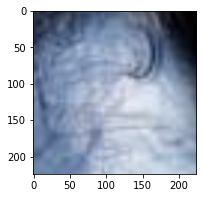

In [20]:
pyplot.imshow(Training_Features[100])

In [21]:
class_list[Training_Label[100]]

'anger'

In [22]:
Training_Features.shape

(28803, 224, 224, 3)

# Testing Data Handaling

In [23]:
Testing_Data=getClassImagesData(Testing_Data_Path)

Number of files to be Traversed--> 500
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,2

In [24]:
Testing_Data[0]

[array([[[26, 32, 27],
         [32, 37, 32],
         [41, 45, 40],
         ...,
         [ 8,  8,  8],
         [ 9,  9,  9],
         [ 9,  9,  9]],
 
        [[23, 29, 24],
         [29, 34, 29],
         [38, 43, 38],
         ...,
         [ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8]],
 
        [[18, 24, 19],
         [25, 30, 25],
         [34, 38, 33],
         ...,
         [ 9,  9,  9],
         [ 8,  8,  8],
         [ 7,  7,  7]],
 
        ...,
 
        [[43, 43, 43],
         [40, 40, 40],
         [35, 35, 35],
         ...,
         [12, 12, 12],
         [12, 12, 12],
         [12, 12, 12]],
 
        [[41, 41, 41],
         [38, 38, 38],
         [34, 34, 34],
         ...,
         [14, 14, 14],
         [14, 14, 14],
         [14, 14, 14]],
 
        [[40, 40, 40],
         [37, 37, 37],
         [33, 33, 33],
         ...,
         [16, 16, 16],
         [16, 16, 16],
         [16, 16, 16]]], dtype=uint8), 0]

In [25]:
Testing_Features=[]
Testing_Label=[]
for image_array_value,label in Testing_Data:
    Testing_Features.append(image_array_value)
    Testing_Label.append(label)
Testing_Features=numpy.array(Testing_Features)
Testing_Label=numpy.array(Testing_Label)

In [3]:
Testing_Features.shape

NameError: ignored

# Saving The Processed Data

In [1]:
Saving_Path="./Data/Preprocessed_Data/"

In [2]:
pickle_training_features=open(Saving_Path+"pickle_training_features_for_transfer_learning.pickle","wb")
pickle.dump(Training_Features,pickle_training_features)
pickle_training_features.close()

FileNotFoundError: ignored

In [ ]:
pickle_training_labels=open(Saving_Path+"pickle_training_labels_for_transfer_learning.pickle","wb")
pickle.dump(Training_Label,pickle_training_labels)
pickle_training_labels.close()

In [ ]:
pickle_testing_features=open(Saving_Path+"pickle_testing_features_for_transfer_learning.pickle","wb")
pickle.dump(Testing_Features,pickle_testing_features)
pickle_testing_features.close()

In [ ]:
pickle_testing_labels=open(Saving_Path+"pickle_testing_labels_for_transfer_learning.pickle","wb")
pickle.dump(Testing_Label,pickle_testing_labels)
pickle_testing_labels.close()